In [199]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
import sys
import os
sys.path.append('../')
from varnn.model import VanillaRNN, VanillaLSTM, BayesRNN, BayesLSTM
from cyclone_data import CycloneTracksDataset

## Location

In [201]:
# ds_name = 'south_pacific_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__south_pacific_ocean__location__2022-09-22_113935/model',
#     'Bayes-RNN': '../runs/BayesRNN__south_pacific_ocean__location__2022-09-23_125547/model',
#     'LSTM': '../runs/VanillaLSTM__south_pacific_ocean__location__2022-09-22_113103/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__south_pacific_ocean__location__2022-09-23_155326/model'
# }

ds_name = 'south_indian_ocean'
models = {
    'RNN': '../runs/VanillaRNN__south_indian_ocean__location__2022-09-22_113836/model',
    'Bayes-RNN': '../runs/BayesRNN__south_indian_ocean__location__2022-09-23_120842/model',
    'LSTM': '../runs/VanillaLSTM__south_indian_ocean__location__2022-09-23_155154/model',
    'Bayes-LSTM': '../runs/BayesLSTM__south_indian_ocean__location__2022-09-23_144654/model'
}


# ds_name = 'north_indian_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__north_indian_ocean__location__2022-09-22_113807/model',
#     'Bayes-RNN': '../runs/BayesRNN__north_indian_ocean__location__2022-09-23_114733/model',
#     'LSTM': '../runs/VanillaLSTM__north_indian_ocean__location__2022-09-22_112908/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__north_indian_ocean__location__2022-09-23_141900/model'
# }

# ds_name = 'north_west_pacific_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__north_west_pacific_ocean__location__2022-09-22_113911/model',
#     'Bayes-RNN': '../runs/BayesRNN__north_west_pacific_ocean__location__2022-09-23_123904/model',
#     'LSTM': '../runs/VanillaLSTM__north_west_pacific_ocean__location__2022-09-22_113034/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__north_west_pacific_ocean__location__2022-09-23_152345/model'
# }

In [202]:


root_dir = os.path.split(os.getcwd())[0]

dims = (1, 2)

data_dir = os.path.join(root_dir, "cyclone_data")
train_dataset = CycloneTracksDataset(
    ds_name, 
    data_dir, 
    train=True, 
    dims=dims
)

# Test dataset
train_min_val = train_dataset.min
train_max_val = train_dataset.max
test_dataset = CycloneTracksDataset(
    ds_name,
    data_dir,
    train=False,
    dims=dims,
    min_=train_min_val,
    max_=train_max_val,
)

In [203]:
length = 8
track_ids = test_dataset.track_id.unique()
track_ids = np.random.choice(track_ids, length)

records = []

for model_name, model_path in models.items():
    model = torch.load(model_path)
    for idx, t in enumerate(track_ids):
        X = test_dataset.X[test_dataset.track_id==t]
        y = test_dataset.y[test_dataset.track_id==t]
        if model_name.find("Bayes") != -1:
            preds = model(X, sampling=True)
        else:
            preds = model(X)
        rmse = torch.sqrt(nn.functional.mse_loss(preds, y))
        # print(model_name, t, f"{rmse.detach().numpy():.3f}")

        records.append({
            'model': model_name,
            'track_id': idx+1,
            'rmse': float(rmse.detach().numpy())
        })


results_df = pd.DataFrame.from_dict(records)
# results_df

In [204]:
# results_df.loc[results_df.model=='Bayes-LSTM', 'rmse'] = results_df.loc[results_df.model=='LSTM', 'rmse'].values + 0.003*np.random.randn(length)

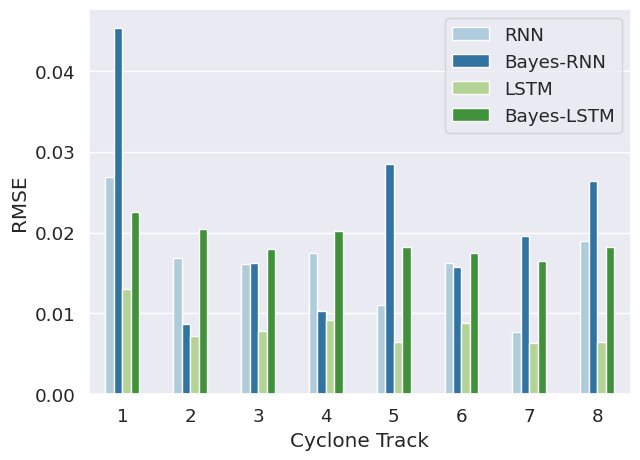

In [205]:
sns.set(font_scale=1.20)
fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    x='track_id', y='rmse', 
    hue='model', 
    ax=ax, data=results_df,
    palette=sns.color_palette("Paired", 4),
    width=0.5,
    

)
plt.ylabel('RMSE')
plt.xlabel('Cyclone Track')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])

## Intensity

In [295]:
# ds_name = 'south_pacific_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__south_pacific_ocean__intensity__2022-09-22_114122/model',
#     'Bayes-RNN': '../runs/BayesRNN__south_pacific_ocean__intensity__2022-09-26_120111/model',
#     'LSTM': '../runs/VanillaLSTM__south_pacific_ocean__intensity__2022-09-22_113316/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__south_pacific_ocean__intensity__2022-09-26_135252/model'
# }

# ds_name = 'south_indian_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__south_indian_ocean__intensity__2022-09-22_114024/model',
#     'Bayes-RNN': '../runs/BayesRNN__south_indian_ocean__intensity__2022-09-26_112142/model',
#     'LSTM': '../runs/VanillaLSTM__south_indian_ocean__intensity__2022-09-26_151606/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__south_indian_ocean__intensity__2022-09-26_123055/model'
# }


ds_name = 'north_indian_ocean'
models = {
    'RNN': '../runs/VanillaRNN__north_indian_ocean__intensity__2022-09-26_152717/model',
    'Bayes-RNN': '../runs/BayesRNN__north_indian_ocean__intensity__2022-09-26_145152/model',
    'LSTM': '../runs/VanillaLSTM__north_indian_ocean__intensity__2022-09-22_113127/model',
    'Bayes-LSTM': '../runs/BayesLSTM__north_indian_ocean__intensity__2022-09-26_142717/model'
}

# ds_name = 'north_west_pacific_ocean'
# models = {
#     'RNN': '../runs/VanillaRNN__north_west_pacific_ocean__intensity__2022-09-26_151026/model',
#     'Bayes-RNN': '../runs/BayesRNN__north_west_pacific_ocean__intensity__2022-09-26_114647/model',
#     'LSTM': '../runs/VanillaLSTM__north_west_pacific_ocean__intensity__2022-09-22_113248/model',
#     'Bayes-LSTM': '../runs/BayesLSTM__north_west_pacific_ocean__intensity__2022-09-26_130246/model'
# }

In [296]:

root_dir = os.path.split(os.getcwd())[0]

dims = (3,)

data_dir = os.path.join(root_dir, "cyclone_data")
train_dataset = CycloneTracksDataset(
    ds_name, 
    data_dir, 
    train=True, 
    dims=dims
)

# Test dataset
train_min_val = train_dataset.min
train_max_val = train_dataset.max
test_dataset = CycloneTracksDataset(
    ds_name,
    data_dir,
    train=False,
    dims=dims,
    min_=train_min_val,
    max_=train_max_val,
)

In [311]:
length = 8
track_ids = test_dataset.track_id.unique()
track_ids = np.random.choice(track_ids, length)
print(track_ids)
records = []

for model_name, model_path in models.items():
    model = torch.load(model_path)
    for idx, t in enumerate(track_ids):
        X = test_dataset.X[test_dataset.track_id==t]
        y = test_dataset.y[test_dataset.track_id==t]
        if model_name.find("Bayes") != -1:
            preds = model(X, sampling=True)
        else:
            preds = model(X)
        rmse = torch.sqrt(nn.functional.mse_loss(preds, y))
        # print(model_name, t, f"{rmse.detach().numpy():.3f}")

        records.append({
            'model': model_name,
            'track_id': idx+1,
            'rmse': float(rmse.detach().numpy())
        })


results_df = pd.DataFrame.from_dict(records)
# results_df

[119  69  74  67 157  83  64 135]


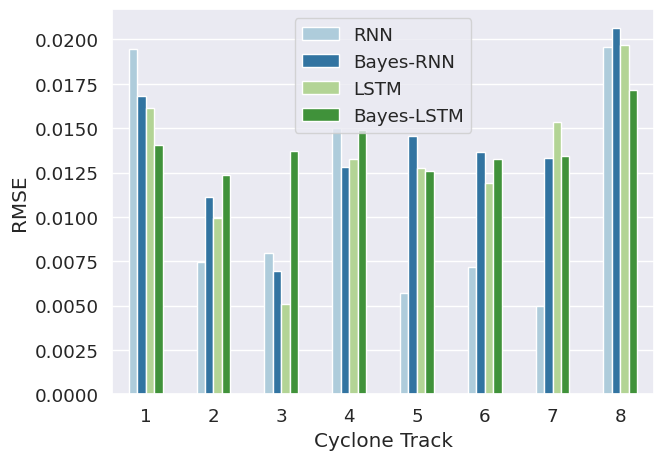

In [312]:
sns.set(font_scale=1.20)
fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(
    x='track_id', y='rmse', 
    hue='model', 
    ax=ax, data=results_df,
    palette=sns.color_palette("Paired", 4),
    width=0.5,
    

)
plt.ylabel('RMSE')
plt.xlabel('Cyclone Track')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])